In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

data.describe()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
data.head().isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [13]:
data.fillna(data.median(), inplace=True)

data.isnull().any()


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

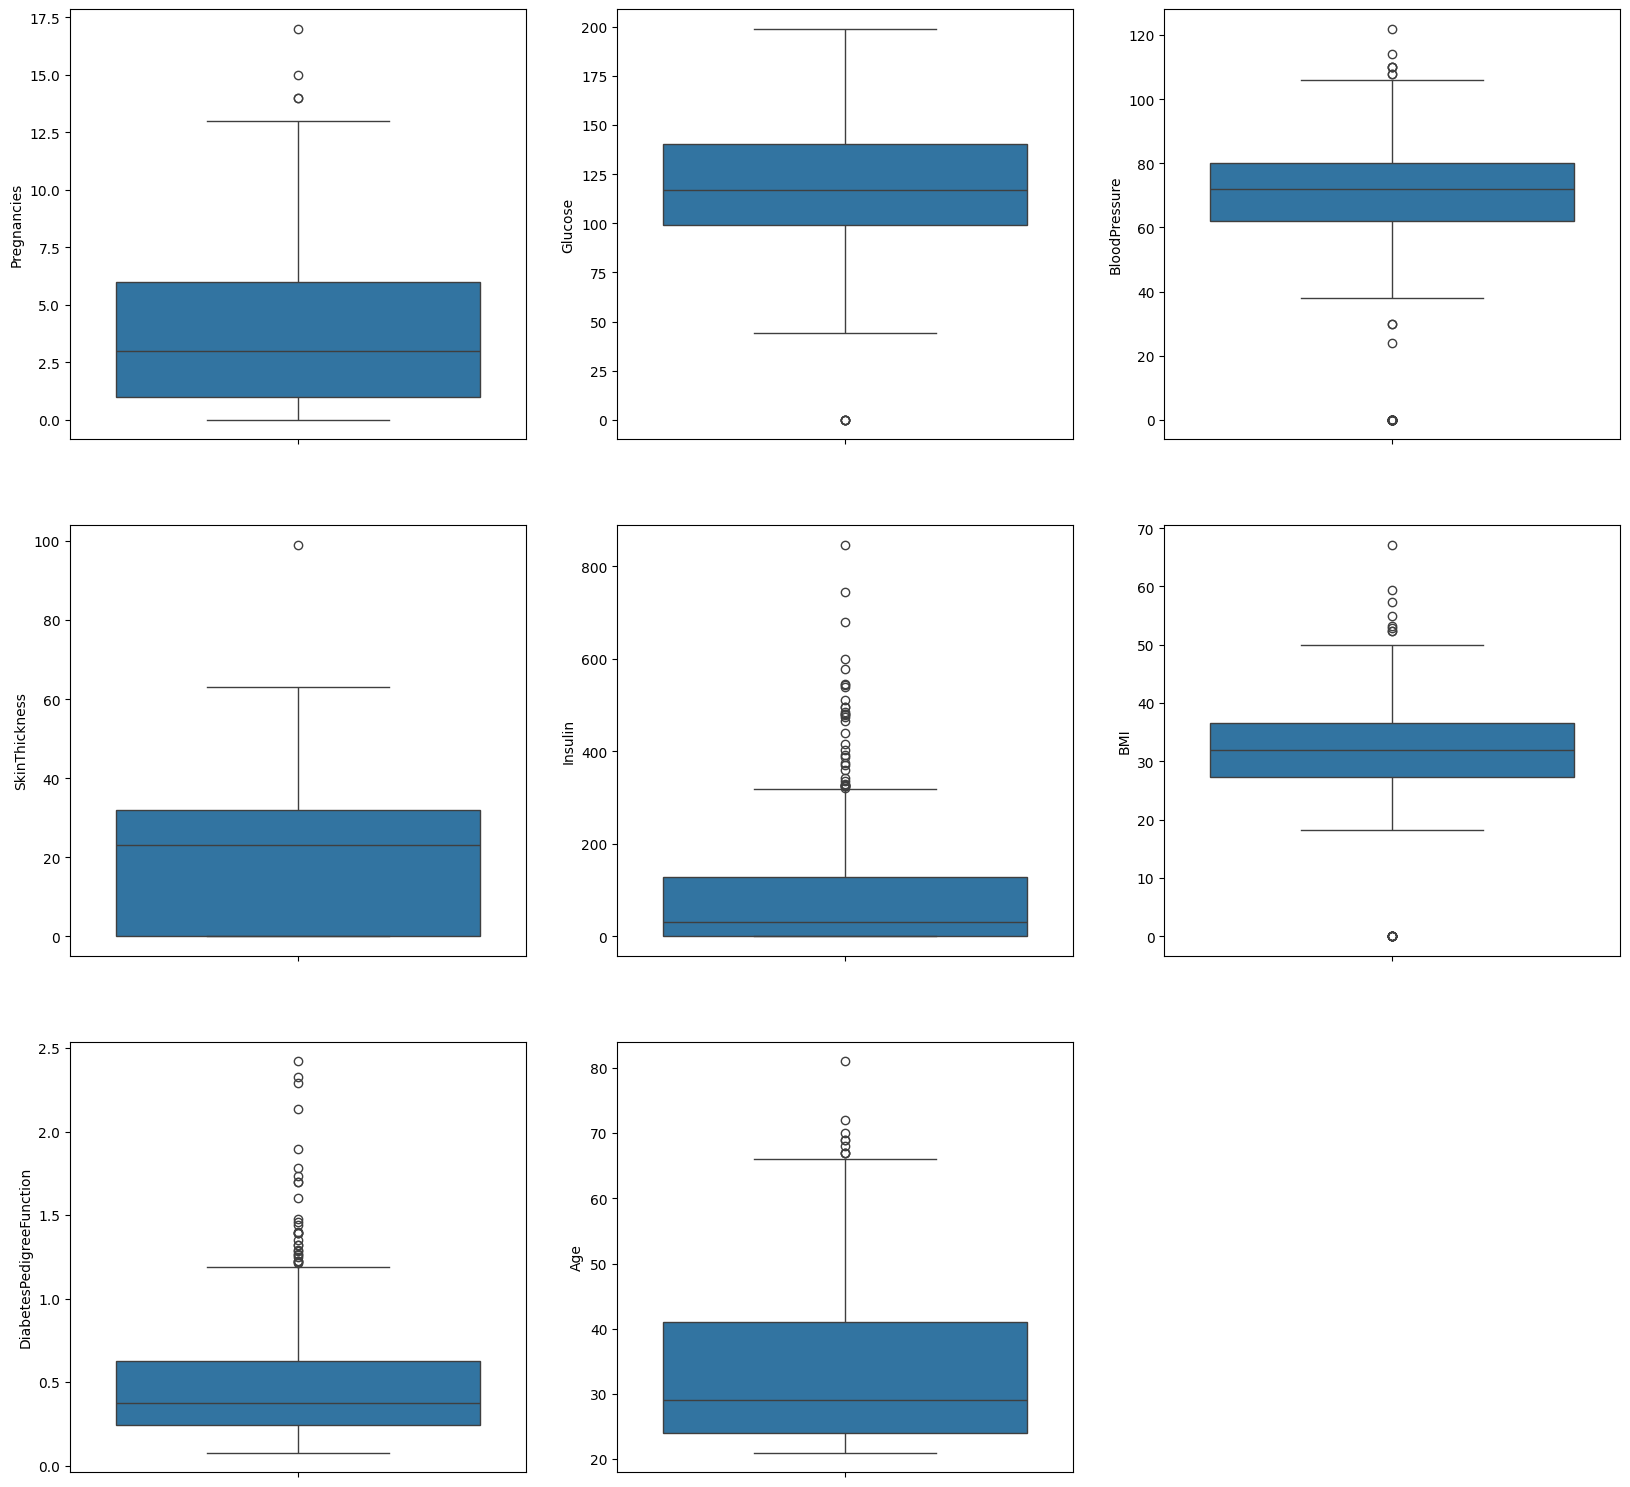

In [14]:
# Outlier detection
plt.figure(figsize=(20,19))

plt.subplot(3,3,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(3,3,2)
sns.boxplot(data['Glucose'])

plt.subplot(3,3,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(3,3,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(3,3,5)
sns.boxplot(data['Insulin'])

plt.subplot(3,3,6)
sns.boxplot(data['BMI'])

plt.subplot(3,3,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(3,3,8)
sns.boxplot(data['Age'])

plt.show()

In [15]:
data['Pregnancies'] = data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05), upper=data['Pregnancies'].quantile(0.95))
data['Glucose'] = data['Glucose'].clip(lower=data['Glucose'].quantile(0.05), upper=data['Glucose'].quantile(0.95))
data['BloodPressure'] = data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05), upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness'] = data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05), upper=data['SkinThickness'].quantile(0.95))
data['Insulin'] = data['Insulin'].clip(lower=data['Insulin'].quantile(0.05), upper=data['Insulin'].quantile(0.95))
data['BMI'] = data['BMI'].clip(lower=data['BMI'].quantile(0.05), upper=data['BMI'].quantile(0.95))
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05), upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age'] = data['Age'].clip(lower=data['Age'].quantile(0.05), upper=data['Age'].quantile(0.95))

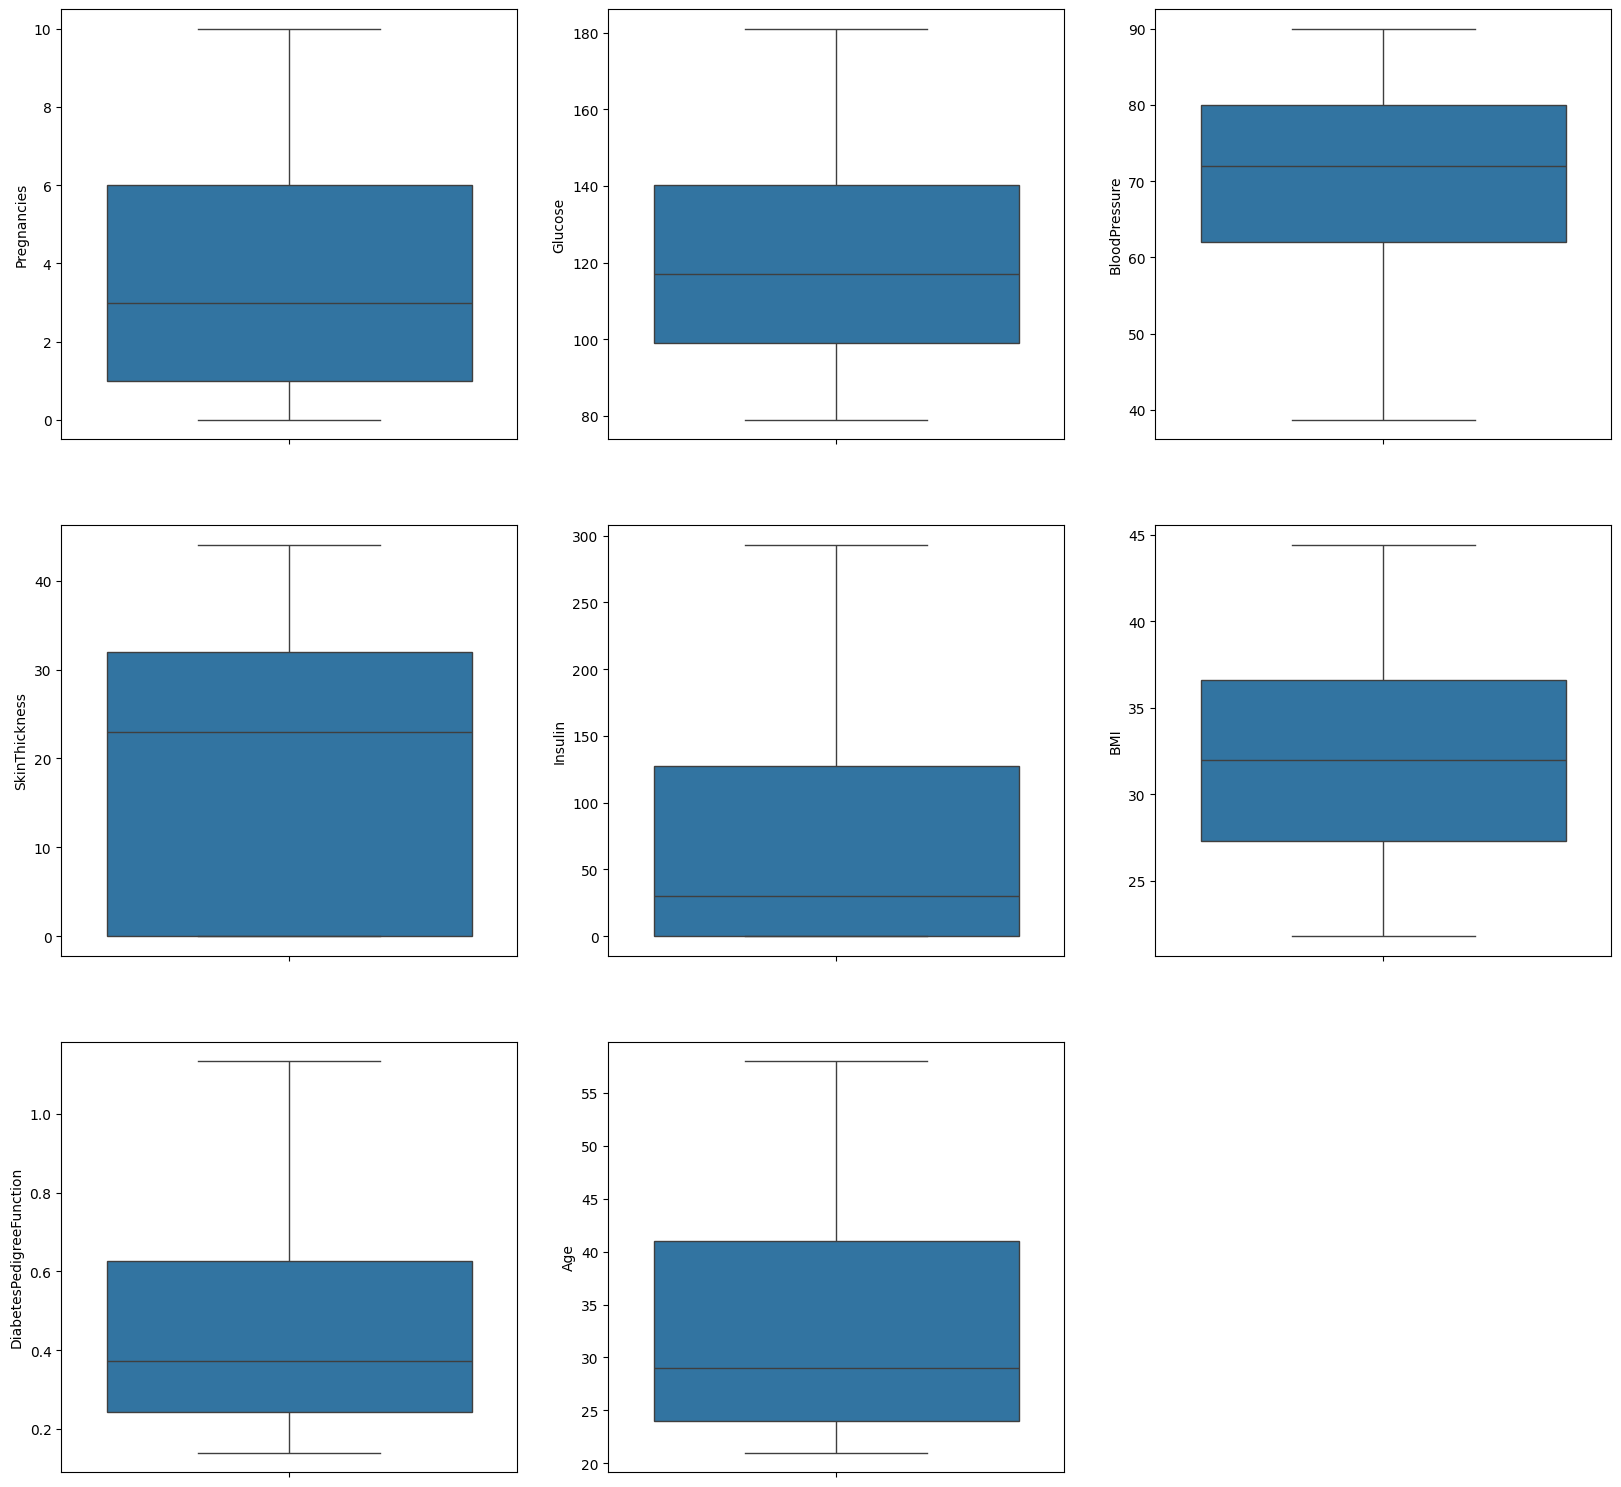

In [16]:
# Outlier detection
plt.figure(figsize=(20,19))

plt.subplot(3,3,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(3,3,2)
sns.boxplot(data['Glucose'])

plt.subplot(3,3,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(3,3,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(3,3,5)
sns.boxplot(data['Insulin'])

plt.subplot(3,3,6)
sns.boxplot(data['BMI'])

plt.subplot(3,3,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(3,3,8)
sns.boxplot(data['Age'])

plt.show()

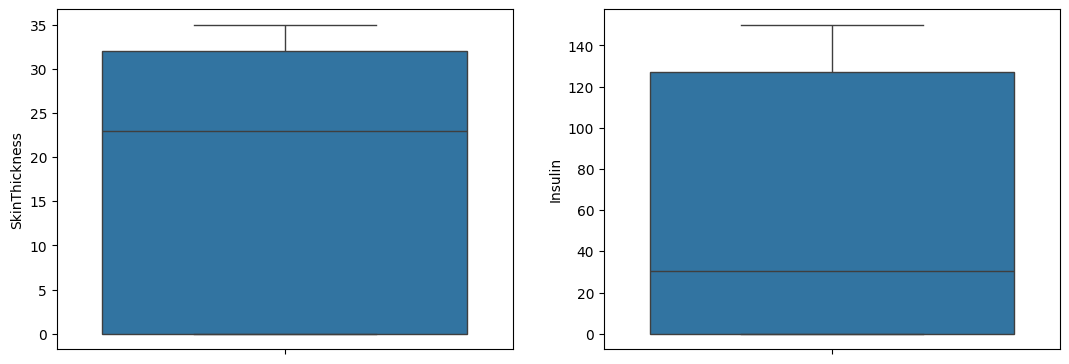

In [17]:
data['SkinThickness'] = data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.21), upper=data['SkinThickness'].quantile(0.80))
data['Insulin'] = data['Insulin'].clip(lower=data['Insulin'].quantile(0.21), upper=data['Insulin'].quantile(0.80))
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(data['SkinThickness'])

plt.subplot(3,3,2)
sns.boxplot(data['Insulin'])

plt.show()

<Axes: ylabel='count'>

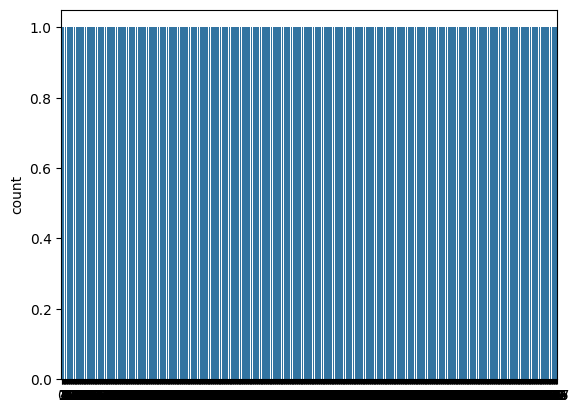

In [18]:
sns.countplot(data['Outcome'])

In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [21]:

y_pred = gnb.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.7922077922077922
Confusion Matrix:
 [[90 17]
 [15 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       107
           1       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



In [22]:
predicted = gnb.predict(x_test)
print('Predicted Outcome:', predicted)

Predicted Outcome: [1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [23]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7922077922077922


In [24]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.7857142857142857
Confusion Matrix:
 [[92 15]
 [18 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



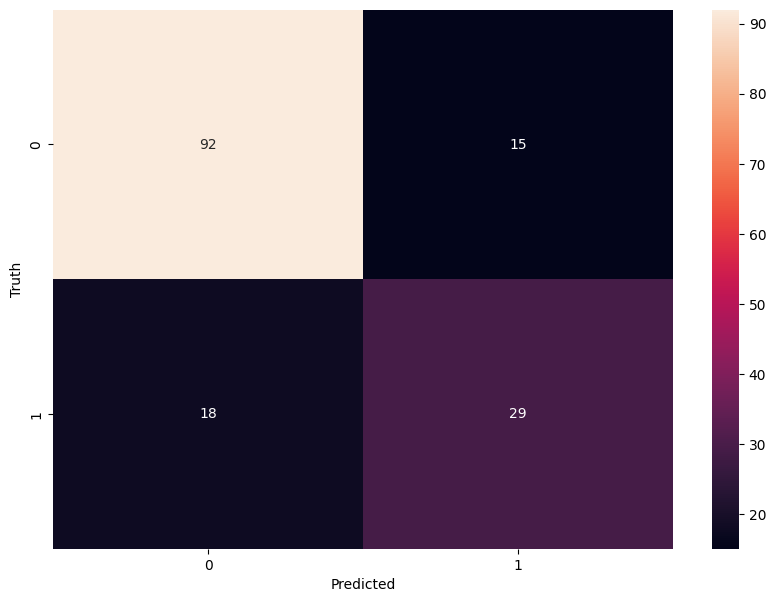

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()